# Tarea N°3 - Máquinas de Aprendizaje - ILI393
### Martín Villanueva A.

## Introducción

En la presente tarea, se experimenta con algoritmos relacionados con redes neuronales artificiales, y ensamblado de máquinas con árboles de clasificación. La mayor parte de los algoritmos probados, corresponden a las implementaciones de Scikit-Learn, excepto por Extreme Learning Machines y Bagging que fueron implementadas, de modo que son compatibles con dicha libreria.

Donde corresponda, se realiza stratified 5-fold cross validation para la selección de los parámetros óptimos. Por temas de espacio, sólo se muestran los resultados de tal proceso en 2 datasets de los 20. Se muestra también histogramas de los mejores parámetros sobre los 20 datasets.

Para la comparación de los errores, se realizan error bars con el promedio del error sobre los 20 datasets. Las barras de error son computadas con el intervalo de confianza para la t-student (del error-rate medio) del 90%.

Todos los algoritmos aqui probados corresponden a la implementaciones presentes en Scikit-Learn v0.18.

## 1. Feedforward ANN sin weight decay

Se prueba a continuación un red Feedforward con una capa oculta. El algoritmo de optimización ocupado corresponde al clásico stochastic gradient descent con learning rate constante. Como función de activación se ocupa la también clásica función logística. Los parámetros que se muestran a continuación, para tamaño de la capa escondida (número de unidades) y learning rate, son los que se prueban en la configuración del cross-validation. 

In [80]:
#parameters to try on MPL
mlp_params = {'hidden_layer_sizes':[(25,),(50,),(75,),(100,),(125)], 'learning_rate_init':[0.05, 0.075, 0.1, 0.125, 0.15]}

##############################################################
Dataset: 3
Best parameter: {'learning_rate_init': 0.1, 'hidden_layer_sizes': 125}
CV scores:
mean: 0.77083, std: 0.02553, params: {'learning_rate_init': 0.05, 'hidden_layer_sizes': (25,)}
mean: 0.77431, std: 0.02965, params: {'learning_rate_init': 0.075, 'hidden_layer_sizes': (25,)}
mean: 0.77604, std: 0.02171, params: {'learning_rate_init': 0.1, 'hidden_layer_sizes': (25,)}
mean: 0.76736, std: 0.02169, params: {'learning_rate_init': 0.125, 'hidden_layer_sizes': (25,)}
mean: 0.77604, std: 0.02467, params: {'learning_rate_init': 0.15, 'hidden_layer_sizes': (25,)}
mean: 0.76389, std: 0.02241, params: {'learning_rate_init': 0.05, 'hidden_layer_sizes': (50,)}
mean: 0.77431, std: 0.02855, params: {'learning_rate_init': 0.075, 'hidden_layer_sizes': (50,)}
mean: 0.76389, std: 0.03698, params: {'learning_rate_init': 0.1, 'hidden_layer_sizes': (50,)}
mean: 0.77431, std: 0.01696, params: {'learning_rate_init': 0.125, 'hidden_layer_si

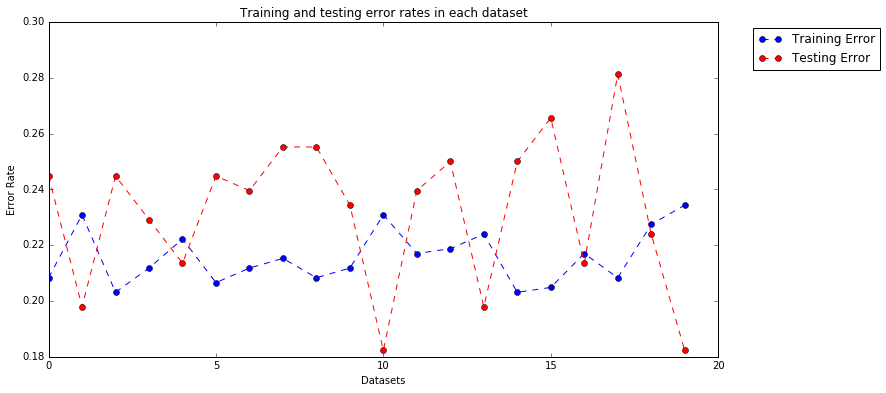

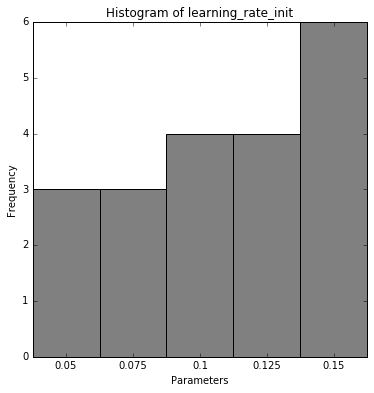

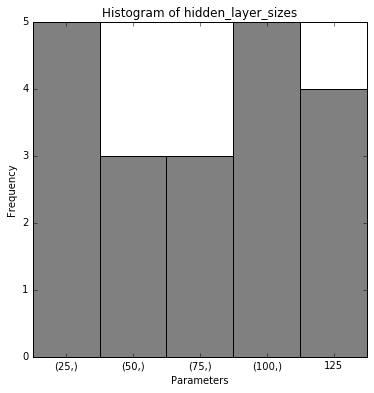

In [81]:
mlp = MLPClassifier(activation='logistic', algorithm='sgd', learning_rate='constant', alpha=0.)
mlp_tr_err, mlp_ts_err = solve_clf(mlp, params=mlp_params, show=[3,17])

**Comentarios u Observaciones:**
- Se ve claramente la presencia de overfitting en las diferencias de training y testing errors.
- El learning rate que mejor resultados obtiene, es el más alto dentro de los posible a elegir.
- El histograma del tamaño de la capa oculta no muestra una distribución muy clara. Sin embargo era esperable que al aumentar el número de capas, la red pueda computar soluciones mucho más complejas y por lo tanto caer en over fitting.

## 2. Feedforward ANN con weight decay

Para la siguiente red Feedforward, se ocupan los parámetros que mejor desempeño obtuvieron en la experiencia anterior. Estos son:
1. learning_rate_init = 0.15
2. hiden_layer\_sizes = 100

sobre esta configuración se agrega weight decay, por medio del término de regularización correspondiente:
$$
\alpha \left( \sum_{r,q} w_{rq}^2 + \sum_{q,i} w_{q,i}^2 \right)
$$

donde el parámetro de control es $\alpha$ (simbolo ocupado en Scikit). Los parámetros que se muestran a continuación son lo $\alpha$'s que se prueban para la configuración del cross-validation.

In [82]:
#parameters to try on MPL
mlp_wd_params = {'alpha':[0.005, 0.01, 0.05, 0.1, 0.5]}

##############################################################
Dataset: 3
Best parameter: {'alpha': 0.01}
CV scores:
mean: 0.76215, std: 0.02801, params: {'alpha': 0.005}
mean: 0.77778, std: 0.02358, params: {'alpha': 0.01}
mean: 0.76736, std: 0.01892, params: {'alpha': 0.05}
mean: 0.77604, std: 0.03201, params: {'alpha': 0.1}
mean: 0.77431, std: 0.02567, params: {'alpha': 0.5}
Training error: 0.223958333333
Testing error: 0.234375
##############################################################


##############################################################
Dataset: 17
Best parameter: {'alpha': 0.005}
CV scores:
mean: 0.78125, std: 0.03031, params: {'alpha': 0.005}
mean: 0.78125, std: 0.01874, params: {'alpha': 0.01}
mean: 0.77083, std: 0.02050, params: {'alpha': 0.05}
mean: 0.77778, std: 0.02898, params: {'alpha': 0.1}
mean: 0.77951, std: 0.02311, params: {'alpha': 0.5}
Training error: 0.201388888889
Testing error: 0.265625
#############################################################

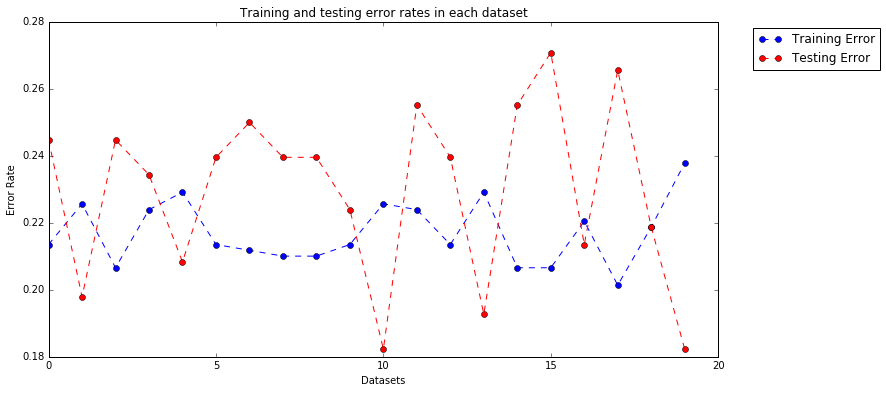

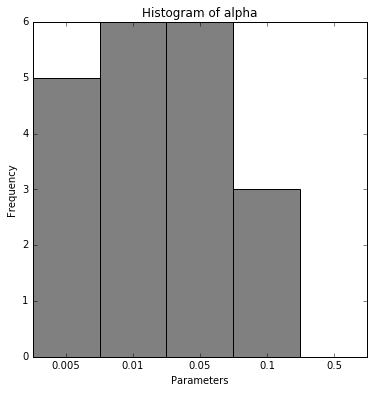

In [83]:
mlp = MLPClassifier(activation='logistic', algorithm='sgd', learning_rate='constant', learning_rate_init=0.15, hidden_layer_sizes=(100,))
mlp_wd_tr_err, mlp_wd_ts_err = solve_clf(mlp, params=mlp_wd_params, show=[3,17])

**Comentarios u observaciones:**
- Se ve una leve tendencia a estrechar las diferencias entre los errores de training y testing. Esta diferencia queda más clara en las sección de comparaciones.

## 3. Extreme Learning Machine

La implementación de ELM aquí probada, corresponde a la implementación propia que puede verse en los anexos de código. Respecto de la implementación, se hace notar lo siguiente:
- La inicialización aleatorea de pesos, se hacer con numpy.random.random que generan valores aletoreos uniformemente distribuidos. Los valores de estos pesos están en el rango [-0.5, 0.5].
- La función de activación ocupada corresponde a la sigmoidal.
- En la capa de salida se realiza logistic regression clásica (pues el problema es de dos clases).

el parámetro de cantidad de unidades de la capa oculta a ocupar en cross-validation se muestra a continuación:

In [69]:
elm_params = {'n_hidden':[50,100,150,200,250]}

##############################################################
Dataset: 3
Best parameter: {'n_hidden': 50}
CV scores:
mean: 0.77951, std: 0.01932, params: {'n_hidden': 50}
mean: 0.77604, std: 0.01920, params: {'n_hidden': 100}
mean: 0.77257, std: 0.02317, params: {'n_hidden': 150}
mean: 0.77604, std: 0.01920, params: {'n_hidden': 200}
mean: 0.77604, std: 0.02098, params: {'n_hidden': 250}
Training error: 0.210069444444
Testing error: 0.223958333333
##############################################################


##############################################################
Dataset: 17
Best parameter: {'n_hidden': 250}
CV scores:
mean: 0.77778, std: 0.02227, params: {'n_hidden': 50}
mean: 0.77431, std: 0.01670, params: {'n_hidden': 100}
mean: 0.77604, std: 0.01331, params: {'n_hidden': 150}
mean: 0.77778, std: 0.01711, params: {'n_hidden': 200}
mean: 0.77951, std: 0.01444, params: {'n_hidden': 250}
Training error: 0.196180555556
Testing error: 0.270833333333
###########################

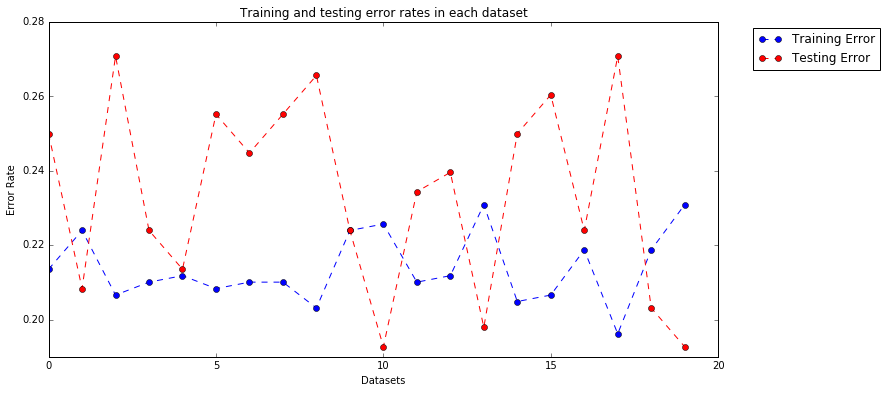

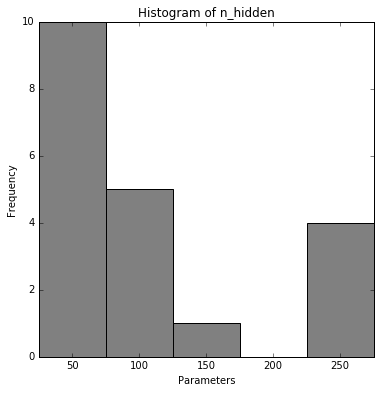

In [70]:
elm = ELM()
elm_tr_err, elm_ts_err = solve_clf(elm, params=elm_params, show=[3,17])

**Comentarios u observaciones:**
- A pesar de que los pesos que conecta la capa de entrada con la oculta, se inicializaron aleatoreamente y no cambian con el tiempo, lo resultados obtenidos por este algorimo es bastante bueno (que más claro en la sección de comparaciones).
- Se ve claramente también que el aumentar la cantidad de nodos en la capa oculta no favorece los resultados de validación que obtiene la red.

## 4. AdaBoost

Se prueba a continuación el algoritmo Adaboost con árboles de clasificación de profundidad 1, variando el número de máquinas entre 5, 10, 15 y 20. 

In [86]:
#adaboost with 5 trees of depth 1
clf = AdaBoost(base_estimator=DecisionTree(max_depth=1), n_estimators=5)
ada5_1_tr_err, ada5_1_ts_err = solve_clf(clf, scale=False, show=[])

#adaboost with 10 trees of depth 1
clf = AdaBoost(base_estimator=DecisionTree(max_depth=1), n_estimators=10)
ada10_1_tr_err, ada10_1_ts_err = solve_clf(clf, scale=False, show=[])

#adaboost with 15 trees of depth 1
clf = AdaBoost(base_estimator=DecisionTree(max_depth=1), n_estimators=15)
ada15_1_tr_err, ada15_1_ts_err = solve_clf(clf, scale=False, show=[])

#adaboost with 20 trees of depth 1
clf = AdaBoost(base_estimator=DecisionTree(max_depth=1), n_estimators=20)
ada20_1_tr_err, ada20_1_ts_err = solve_clf(clf, scale=False, show=[])

Los resultados que se muestran a continuación corresponden a la variación del error de entrenamiento y testing, respecto a la cantidad de máquinas utilizadas. Los errores son presentados por error bars, correspondientes al intervalo de confianza para la media de error, distribuido $t\text{-student}$.

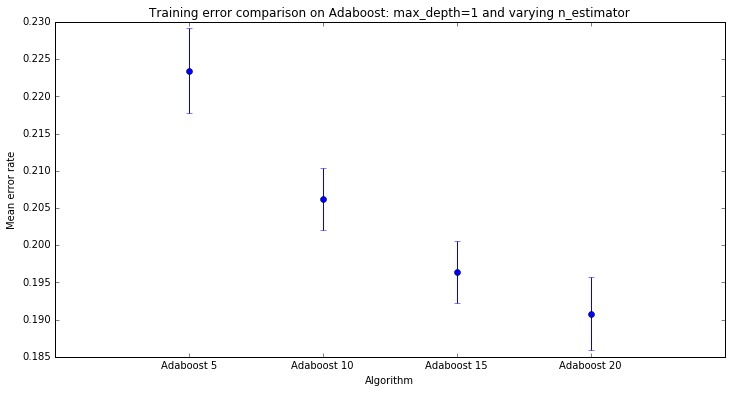

In [87]:
tr_errors = [('Adaboost 5',ada5_1_tr_err), ('Adaboost 10',ada10_1_tr_err), ('Adaboost 15',ada15_1_tr_err), ('Adaboost 20',ada20_1_tr_err)]
plot_errorbars(tr_errors, title='Training error comparison on Adaboost: max_depth=1 and varying n_estimator')

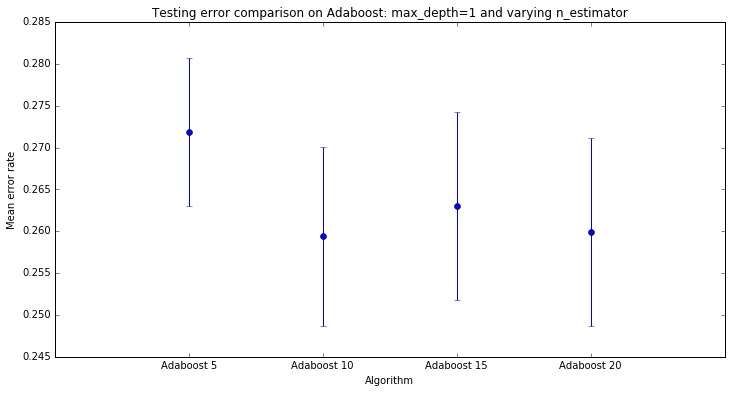

In [88]:
ts_errors = [('Adaboost 5',ada5_1_ts_err), ('Adaboost 10',ada10_1_ts_err), ('Adaboost 15',ada15_1_ts_err), ('Adaboost 20',ada20_1_ts_err)]
plot_errorbars(ts_errors, title='Testing error comparison on Adaboost: max_depth=1 and varying n_estimator')

**Comentarios u observaciones:**
- El training error baja considerablemente al aumentar la cantidad de máquinas, lo cual es bastante consistente con el algoritmo Adaboost, que precisamente en cada iteración adapta sus learners para aprender mejor en los datos (de training) en que esta fallando.
- El testing error tambien presenta mejoras.

## 5. Bagging

In [101]:
#bagging with 5 trees of depth 1
clf = Bagging(n_estimators=5, max_depth=1)
bag5_1_tr_err, bag5_1_ts_err = solve_clf(clf, scale=False, show=[])

#bagging with 10 trees of depth 1
clf = Bagging(n_estimators=10, max_depth=1)
bag10_1_tr_err, bag10_1_ts_err = solve_clf(clf, scale=False, show=[])

#bagging with 15 trees of depth 1
clf = Bagging(n_estimators=15, max_depth=1)
bag15_1_tr_err, bag15_1_ts_err = solve_clf(clf, scale=False, show=[])

#bagging with 20 trees of depth 1
clf = Bagging(n_estimators=20, max_depth=1)
bag20_1_tr_err, bag20_1_ts_err = solve_clf(clf, scale=False, show=[])

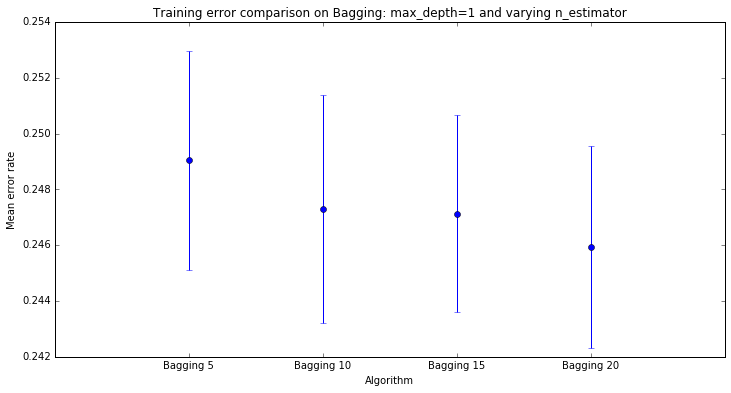

In [102]:
tr_errors = [('Bagging 5',bag5_1_tr_err), ('Bagging 10',bag10_1_tr_err), ('Bagging 15',bag15_1_tr_err), ('Bagging 20',bag20_1_tr_err)]
plot_errorbars(tr_errors, title='Training error comparison on Bagging: max_depth=1 and varying n_estimator')

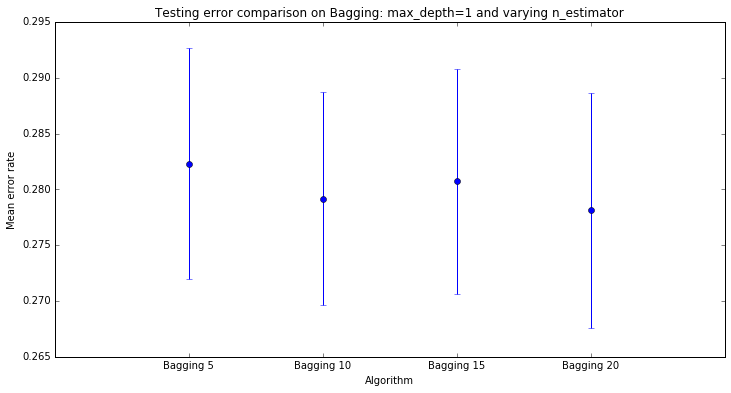

In [103]:
ts_errors = [('Bagging 5',bag5_1_ts_err), ('Bagging 10',bag10_1_ts_err), ('Bagging 15',bag15_1_ts_err), ('Bagging 20',bag20_1_ts_err)]
plot_errorbars(ts_errors, title='Testing error comparison on Bagging: max_depth=1 and varying n_estimator')

## 6. Variando la profundidad de los árboles

### Adaboost con árboles de profundidad 2

In [104]:
#adaboost with 5 trees of depth 2
clf = AdaBoost(base_estimator=DecisionTree(max_depth=2), n_estimators=5)
ada5_2_tr_err, ada5_2_ts_err = solve_clf(clf, scale=False, show=[])
#adaboost with 10 trees of depth 2
clf = AdaBoost(base_estimator=DecisionTree(max_depth=2), n_estimators=10)
ada10_2_tr_err, ada10_2_ts_err = solve_clf(clf, scale=False, show=[])
#adaboost with 15 trees of depth 2
clf = AdaBoost(base_estimator=DecisionTree(max_depth=2), n_estimators=15)
ada15_2_tr_err, ada15_2_ts_err = solve_clf(clf, scale=False, show=[])
#adaboost with 20 trees of depth 2
clf = AdaBoost(base_estimator=DecisionTree(max_depth=2), n_estimators=20)
ada20_2_tr_err, ada20_2_ts_err = solve_clf(clf, scale=False, show=[])

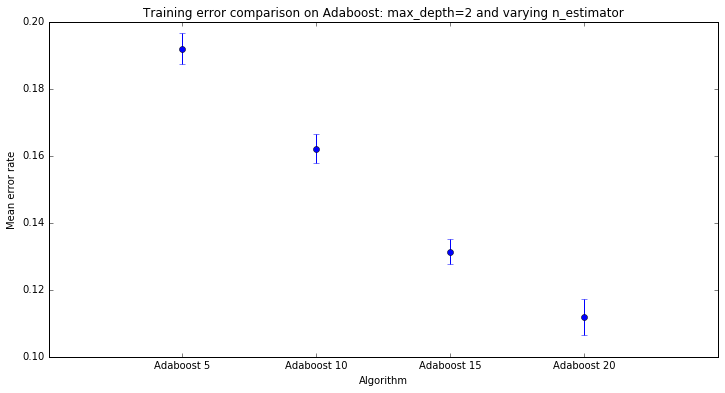

In [107]:
tr_errors = [('Adaboost 5',ada5_2_tr_err), ('Adaboost 10',ada10_2_tr_err), ('Adaboost 15',ada15_2_tr_err), ('Adaboost 20',ada20_2_tr_err)]
plot_errorbars(tr_errors, title='Training error comparison on Adaboost: max_depth=2 and varying n_estimator')

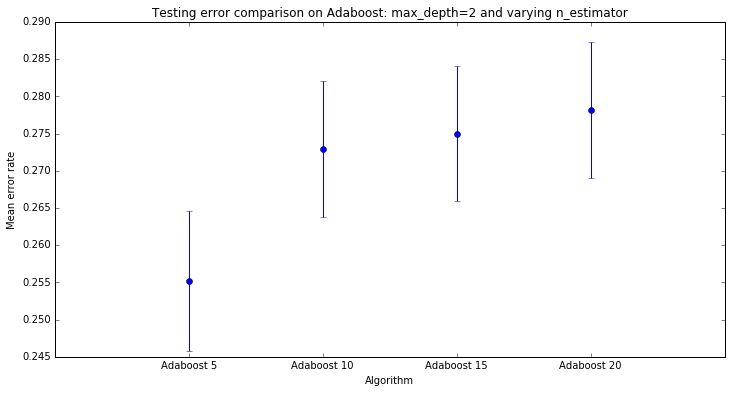

In [108]:
ts_errors = [('Adaboost 5',ada5_2_ts_err), ('Adaboost 10',ada10_2_ts_err), ('Adaboost 15',ada15_2_ts_err), ('Adaboost 20',ada20_2_ts_err)]
plot_errorbars(ts_errors, title='Testing error comparison on Adaboost: max_depth=2 and varying n_estimator')

### Adaboost con árboles de profundidad 3

In [112]:
#adaboost with 5 trees of depth 3
clf = AdaBoost(base_estimator=DecisionTree(max_depth=3), n_estimators=5)
ada5_3_tr_err, ada5_3_ts_err = solve_clf(clf, scale=False, show=[])
#adaboost with 10 trees of depth 3
clf = AdaBoost(base_estimator=DecisionTree(max_depth=3), n_estimators=10)
ada10_3_tr_err, ada10_3_ts_err = solve_clf(clf, scale=False, show=[])
#adaboost with 15 trees of depth 3
clf = AdaBoost(base_estimator=DecisionTree(max_depth=3), n_estimators=15)
ada15_3_tr_err, ada15_3_ts_err = solve_clf(clf, scale=False, show=[])
#adaboost with 20 trees of depth 3
clf = AdaBoost(base_estimator=DecisionTree(max_depth=3), n_estimators=20)
ada20_3_tr_err, ada20_3_ts_err = solve_clf(clf, scale=False, show=[])

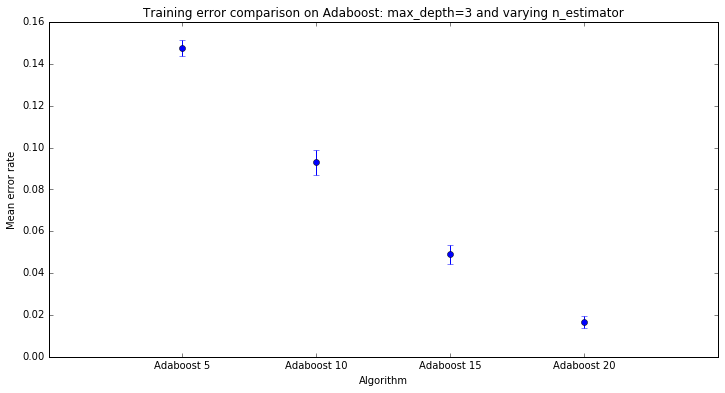

In [113]:
tr_errors = [('Adaboost 5',ada5_3_tr_err), ('Adaboost 10',ada10_3_tr_err), ('Adaboost 15',ada15_3_tr_err), ('Adaboost 20',ada20_3_tr_err)]
plot_errorbars(tr_errors, title='Training error comparison on Adaboost: max_depth=3 and varying n_estimator')

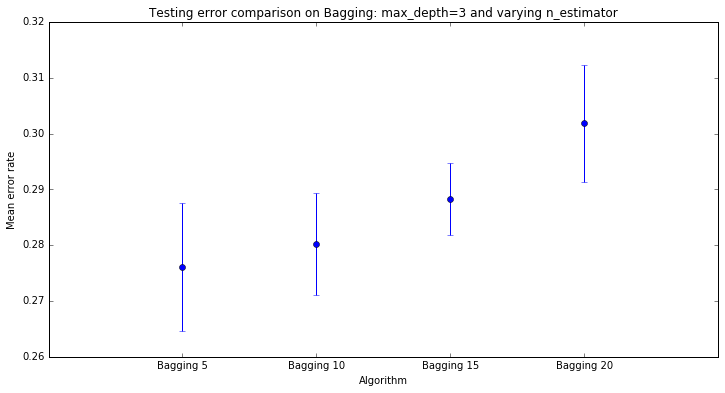

In [114]:
ts_errors = [('Bagging 5',ada5_3_ts_err), ('Bagging 10',ada10_3_ts_err), ('Bagging 15',ada15_3_ts_err), ('Bagging 20',ada20_3_ts_err)]
plot_errorbars(ts_errors, title='Testing error comparison on Bagging: max_depth=3 and varying n_estimator')

### Comparación de Adaboost para distinta profundidad de árbol y número de máquinas

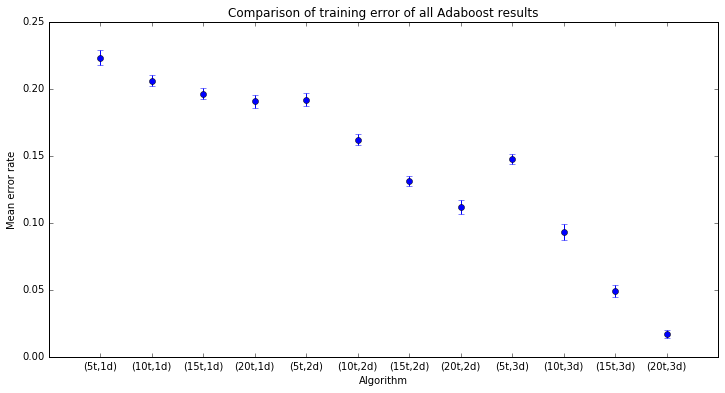

In [115]:
tr_errors = [('(5t,1d)',ada5_1_tr_err),('(10t,1d)',ada10_1_tr_err),('(15t,1d)',ada15_1_tr_err),('(20t,1d)',ada20_1_tr_err),
             ('(5t,2d)',ada5_2_tr_err),('(10t,2d)',ada10_2_tr_err),('(15t,2d)',ada15_2_tr_err),('(20t,2d)',ada20_2_tr_err),
             ('(5t,3d)',ada5_3_tr_err),('(10t,3d)',ada10_3_tr_err),('(15t,3d)',ada15_3_tr_err),('(20t,3d)',ada20_3_tr_err)]
plot_errorbars(tr_errors, "Comparison of training error of all Adaboost results")

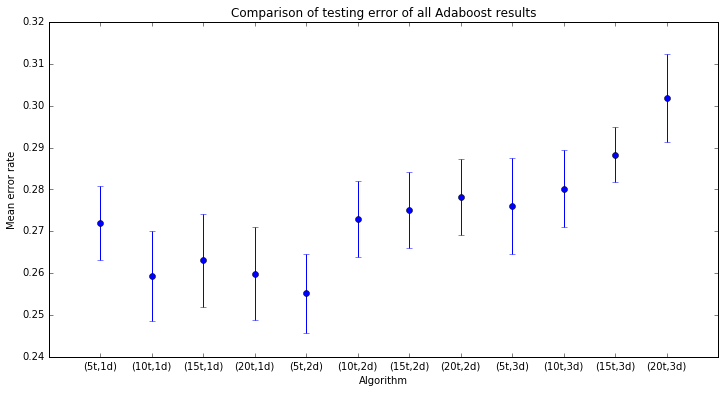

In [116]:
ts_errors = [('(5t,1d)',ada5_1_ts_err),('(10t,1d)',ada10_1_ts_err),('(15t,1d)',ada15_1_ts_err),('(20t,1d)',ada20_1_ts_err),
             ('(5t,2d)',ada5_2_ts_err),('(10t,2d)',ada10_2_ts_err),('(15t,2d)',ada15_2_ts_err),('(20t,2d)',ada20_2_ts_err),
             ('(5t,3d)',ada5_3_ts_err),('(10t,3d)',ada10_3_ts_err),('(15t,3d)',ada15_3_ts_err),('(20t,3d)',ada20_3_ts_err)]
plot_errorbars(ts_errors, "Comparison of testing error of all Adaboost results")

### Bagging con árboles de profundidad 2

In [117]:
#bagging with 5 trees of depth 2
clf = Bagging(n_estimators=5, max_depth=2)
bag5_2_tr_err, bag5_2_ts_err = solve_clf(clf, scale=False, show=[])
#bagging with 10 trees of depth 2
clf = Bagging(n_estimators=10, max_depth=2)
bag10_2_tr_err, bag10_2_ts_err = solve_clf(clf, scale=False, show=[])
#bagging with 15 trees of depth 2
clf = Bagging(n_estimators=15, max_depth=2)
bag15_2_tr_err, bag15_2_ts_err = solve_clf(clf, scale=False, show=[])
#bagging with 20 trees of depth 2
clf = Bagging(n_estimators=20, max_depth=2)
bag20_2_tr_err, bag20_2_ts_err = solve_clf(clf, scale=False, show=[])

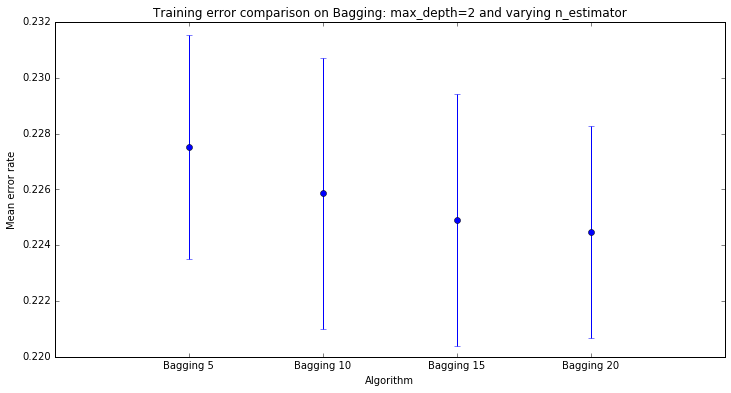

In [118]:
tr_errors = [('Bagging 5',bag5_2_tr_err), ('Bagging 10',bag10_2_tr_err), ('Bagging 15',bag15_2_tr_err), ('Bagging 20',bag20_2_tr_err)]
plot_errorbars(tr_errors, title='Training error comparison on Bagging: max_depth=2 and varying n_estimator')

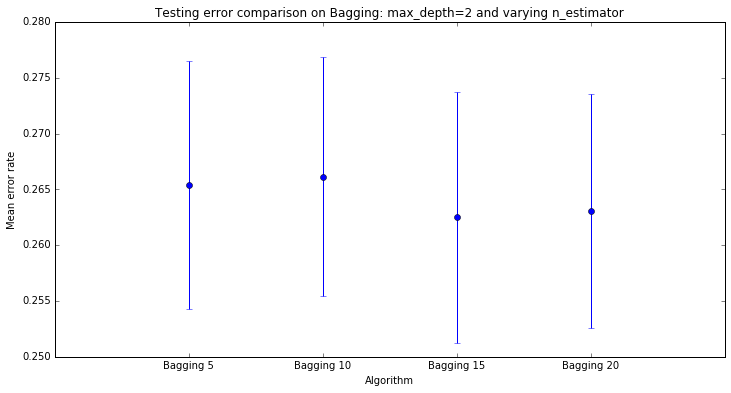

In [119]:
ts_errors = [('Bagging 5',bag5_2_ts_err), ('Bagging 10',bag10_2_ts_err), ('Bagging 15',bag15_2_ts_err), ('Bagging 20',bag20_2_ts_err)]
plot_errorbars(ts_errors, title='Testing error comparison on Bagging: max_depth=2 and varying n_estimator')

### Bagging con árboles de profundidad 3

In [133]:
#bagging with 5 trees of depth 3
clf = Bagging(n_estimators=5, max_depth=3)
bag5_3_tr_err, bag5_3_ts_err = solve_clf(clf, scale=False, show=[])
#bagging with 10 trees of depth 3
clf = Bagging(n_estimators=10, max_depth=3)
bag10_3_tr_err, bag10_3_ts_err = solve_clf(clf, scale=False, show=[])
#bagging with 15 trees of depth 3
clf = Bagging(n_estimators=15, max_depth=3)
bag15_3_tr_err, bag15_3_ts_err = solve_clf(clf, scale=False, show=[])
#bagging with 20 trees of depth 3
clf = Bagging(n_estimators=20, max_depth=3)
bag20_3_tr_err, bag20_3_ts_err = solve_clf(clf, scale=False, show=[])

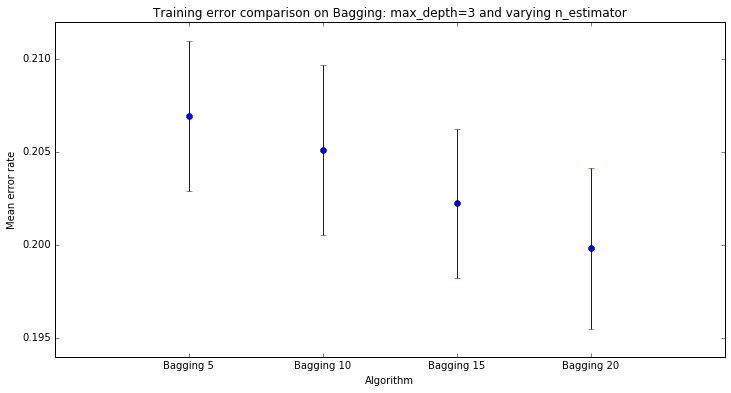

In [134]:
tr_errors = [('Bagging 5',bag5_3_tr_err), ('Bagging 10',bag10_3_tr_err), ('Bagging 15',bag15_3_tr_err), ('Bagging 20',bag20_3_tr_err)]
plot_errorbars(tr_errors, title='Training error comparison on Bagging: max_depth=3 and varying n_estimator')

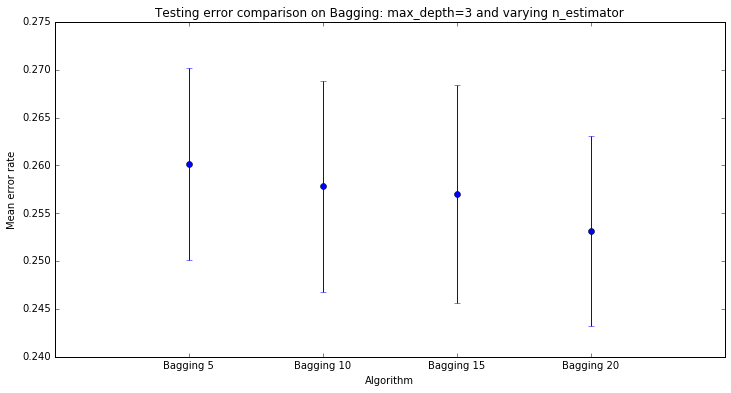

In [135]:
tr_errors = [('Bagging 5',bag5_3_ts_err), ('Bagging 10',bag10_3_ts_err), ('Bagging 15',bag15_3_ts_err), ('Bagging 20',bag20_3_ts_err)]
plot_errorbars(tr_errors, title='Testing error comparison on Bagging: max_depth=3 and varying n_estimator')

### Comparación de Bagging para distinta profundidad de árbol y número de máquinas

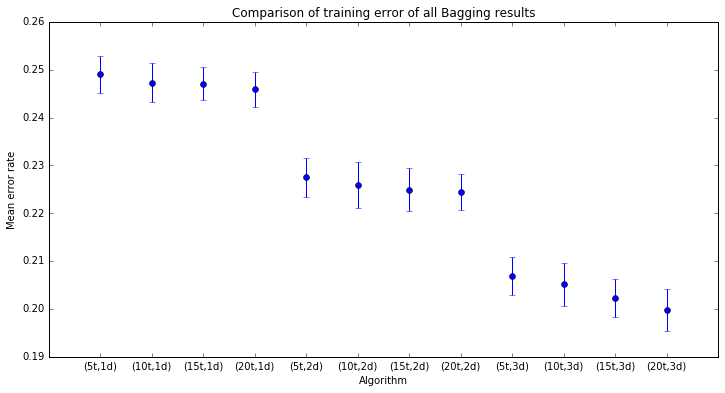

In [136]:
tr_errors = [('(5t,1d)',bag5_1_tr_err),('(10t,1d)',bag10_1_tr_err),('(15t,1d)',bag15_1_tr_err),('(20t,1d)',bag20_1_tr_err),
             ('(5t,2d)',bag5_2_tr_err),('(10t,2d)',bag10_2_tr_err),('(15t,2d)',bag15_2_tr_err),('(20t,2d)',bag20_2_tr_err),
             ('(5t,3d)',bag5_3_tr_err),('(10t,3d)',bag10_3_tr_err),('(15t,3d)',bag15_3_tr_err),('(20t,3d)',bag20_3_tr_err)]
plot_errorbars(tr_errors, "Comparison of training error of all Bagging results")

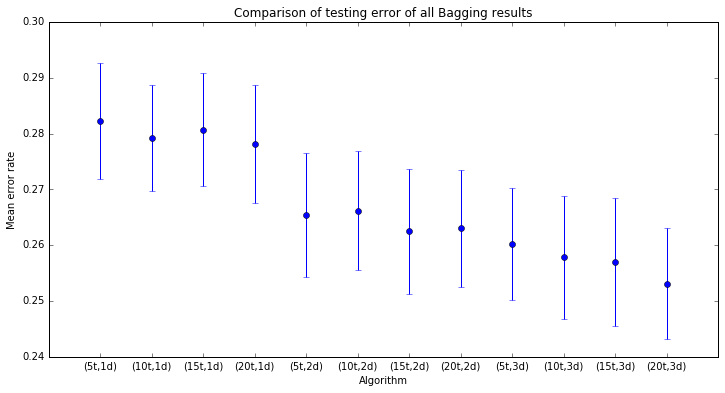

In [137]:
ts_errors = [('(5t,1d)',bag5_1_ts_err),('(10t,1d)',bag10_1_ts_err),('(15t,1d)',bag15_1_ts_err),('(20t,1d)',bag20_1_ts_err),
             ('(5t,2d)',bag5_2_ts_err),('(10t,2d)',bag10_2_ts_err),('(15t,2d)',bag15_2_ts_err),('(20t,2d)',bag20_2_ts_err),
             ('(5t,3d)',bag5_3_ts_err),('(10t,3d)',bag10_3_ts_err),('(15t,3d)',bag15_3_ts_err),('(20t,3d)',bag20_3_ts_err)]
plot_errorbars(ts_errors, "Comparison of testing error of all Bagging results")

## 7. Comparaciones

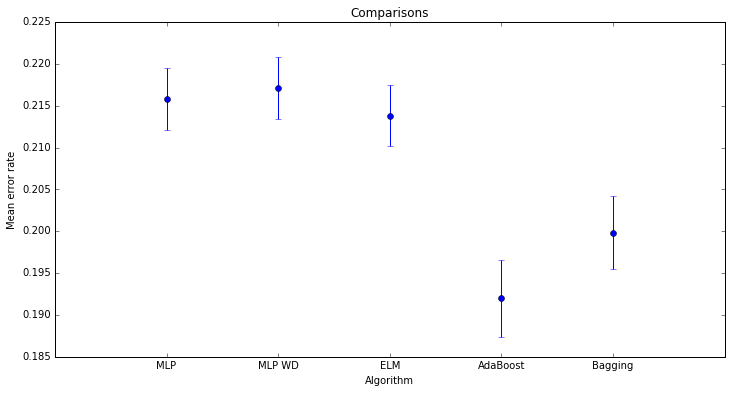

In [138]:
tr_errors = [('MLP',mlp_tr_err),('MLP WD',mlp_wd_tr_err),('ELM',elm_tr_err),('AdaBoost',ada5_2_tr_err), ('Bagging',bag20_3_tr_err),]
plot_errorbars(tr_errors, title='Comparisons')

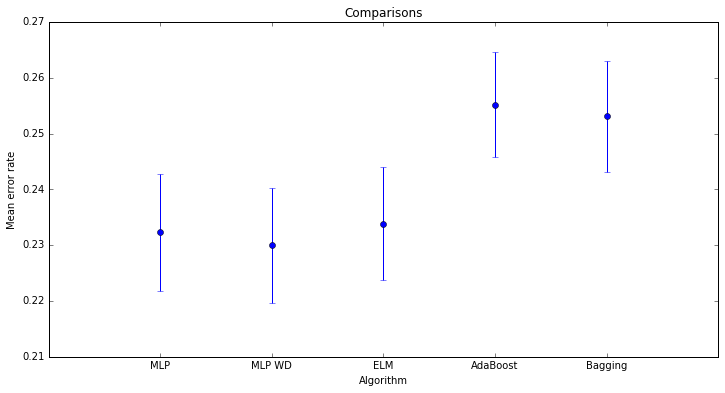

In [139]:
ts_errors = [('MLP',mlp_ts_err),('MLP WD',mlp_wd_ts_err),('ELM',elm_ts_err),('AdaBoost',ada5_2_ts_err), ('Bagging',bag20_3_ts_err),]
plot_errorbars(ts_errors, title='Comparisons')

## Anexo de Código

**Observación:** Para la correcta ejecución del código en el informe, primero se deben ejecutar las celdas del anexo de código aquí abajo.

### Configuración del notebook

In [53]:
#notebook settings
%matplotlib inline

#import some useful libraries and utilities
import numpy as np
import scipy as sp
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.grid_search import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier as DecisionTree
from sklearn.ensemble import AdaBoostClassifier as AdaBoost

## Métricas de error para clasificación

In [3]:
#precision
def precision(yreal, ypred):
    yr = yreal.astype(int)
    yp = ypred.astype(int) 
    m, = yr.shape
    #number of good predictions/number of predictions
    return np.sum(yp==yr)/float(m)

#error rate 
def error_rate(yreal, ypred):
    return 1.-precision(yreal, ypred)

## Funciones complementarias (helpers) para obtener resultados

In [4]:
"""
Function to generate histogram of winners
"""
def make_hist(winners,params):
    for key in winners:
        par = params[key]
        win = np.array(winners[key])
        freqs = np.zeros(5)
        for i in xrange(5):
            freqs[i] = np.sum(par[i]==win)
        labels = map(str,par)
        pos = np.arange(len(labels))
        width = 1.0
        fig = plt.figure()
        fig.set_figheight(6)
        fig.set_figwidth(6)
        ax = plt.axes()
        ax.set_xticks(pos + (width / 2))
        ax.set_xticklabels(labels)
        plt.xlabel('Parameters')
        plt.ylabel('Frequency')
        plt.title('Histogram of {0}'.format(key))
        plt.bar(pos, freqs, width, color='0.5')
        plt.show()
    
def plot_error(tr_err, ts_err):
    x = np.arange(20)
    plt.figure(figsize=(12,6))
    plt.plot(x, tr_err, marker='o', linestyle='--', color='b', label='Training Error')
    plt.plot(x, ts_err, marker='o', linestyle='--', color='r', label='Testing Error')
    plt.xlabel('Datasets')
    plt.ylabel('Error Rate')
    plt.title('Training and testing error rates in each dataset')
    plt.legend(bbox_to_anchor=(1.25, 1.0))
    plt.show()
    

def mean_confidence_interval(data, confidence=0.9):
    #computing confidence interval
    n = data.shape[0]
    mu = np.mean(data)
    sem = sp.stats.sem(data)
    h1,h2 = sp.stats.t.interval(confidence, n-1, loc=mu, scale=sem)
    return mu, h1, h2

def mean_percentile(data, inf=10, sup=90):
    mu = np.mean(data)
    h1, h2 = np.percentile(data, [10,90])
    return mu, h1, h2

def plot_errorbars(errors, title=None):
    mean = []
    lower = []
    upper = []
    labels = []
    for label,error in errors:
        mu,l,u = mean_confidence_interval(error)
        #mu,l,u = mean_percentile(error)
        mean.append(mu)
        lower.append(l)
        upper.append(u)
        labels.append(label)
    x = np.arange(3, len(errors)+3)
    mean = np.array(mean)
    lower = mean-np.array(lower)
    upper = np.array(upper)-mean
    plt.figure(figsize=(12,6))
    plt.xlim([2,len(errors)+3])
    plt.xticks(x, labels)
    plt.errorbar(x, mean, yerr=[lower,upper],fmt='o')
    plt.xlabel('Algorithm')
    plt.ylabel('Mean error rate')
    plt.title(title)
    plt.show()

"""
Generate solutions for classification problems
"""
def solve_clf(clf, params=None, scale=True, show=None):
    if params is not None:
        winners = dict()
        for key in params:
            winners[key] = list()
            
    #set dataset name
    path = './diabetes/diabetes'
    
    #error-rates to plot
    tr_err = np.empty(20)
    ts_err = np.empty(20)
    
    #iterate through data
    for i in xrange(20):
        #loading datasets
        tr_file = path+'-tr-{0}.npy'.format(i)
        ts_file = path+'-ts-{0}.npy'.format(i)
            
        tr_data = np.load(tr_file)
        ts_data = np.load(ts_file)
        
        if scale:
            #perform same scaling on training and testing sets
            scaler = StandardScaler()
            scaler.fit(tr_data[:,:-1])
            X_tr = scaler.transform(tr_data[:,:-1])
            X_ts = scaler.transform(ts_data[:,:-1])
        else: 
            X_tr = tr_data[:,:-1]
            X_ts = ts_data[:,:-1]
        y_tr = np.ascontiguousarray(tr_data[:,-1])
        y_ts = np.ascontiguousarray(ts_data[:,-1])

        if params is not None:
            #tunning parameters
            gs = GridSearchCV(clf, params, cv=5, n_jobs=2)
            gs.fit(X_tr, y_tr)
            grid_scores = gs.grid_scores_
            best_params = gs.best_params_
            for key in winners:
                bparam = best_params[key]
                if type(bparam)==tuple:
                    winners[key].append(bparam[0])
                else:
                    winners[key].append(bparam)
            #traininig with best parameters
            clf.set_params(**best_params)
            clf.fit(X_tr, y_tr)
        else:
            clf.fit(X_tr, y_tr)
        
        #computing errors
        tr_err[i] = error_rate(y_tr, clf.predict(X_tr))
        ts_err[i] = error_rate(y_ts, clf.predict(X_ts))
        
        if (show != None) and (i not in show): continue
        print "##############################################################"
        print "Dataset: {0}".format(i)
        if params is not None:
            print 'Best parameter: {0}'.format(best_params)
            print 'CV scores:'
            for result in grid_scores: print result
        print 'Training error: {0}'.format(tr_err[i])
        print 'Testing error: {0}'.format(ts_err[i])
        print "##############################################################"
        print '\n'
    
    #ploting errors
    if show: 
        plot_error(tr_err, ts_err)
        if params is not None: make_hist(winners, params)
    return (tr_err,ts_err)

## Implementación de Extreme Learning Machine

In [5]:
def sigmoid(z):
    return 1./(1.+np.exp(-z))

In [6]:
class ELM(BaseEstimator, ClassifierMixin):
    def __init__(self, n_hidden=10, activation=sigmoid):
        self.n_hidden = n_hidden
        self.activation = activation
    
    def fit(self, X, y):
        #creating a random matrix W with the weights of the hidden layer
        #weights are between -0.5 and 0.5
        M,I = X.shape
        W = np.random.random((I,self.n_hidden))
        W -= 0.5
        #storing it in the object attribute
        self.W = W
        
        #computing output values of hidden nodes
        H = self.activation(np.dot(X,W))
        
        #softmax-logistic regression
        clf = LogisticRegression()
        clf.fit(H,y)
        self.clf = clf
        return self
    
    def predict(self, X):
        H = self.activation(np.dot(X,self.W))
        return self.clf.predict(H)
    
    def score(self, X, y):
        H = self.activation(np.dot(X,self.W))
        return self.clf.score(H,y)

## Implementación de Bagging

In [7]:
class Bagging(BaseEstimator,ClassifierMixin):
    def __init__(self, n_estimators=5, max_depth=1):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        
    def fit(self, X, y):
        #list where estimators will be stored
        estimators = []
        #indexes of X
        ind = np.arange(X.shape[0])
        #fitting all the classifiers
        for i in xrange(self.n_estimators):
            #bootstraped indexes
            b_ind = resample(ind, replace=True)
            clf = DecisionTree(max_depth=self.max_depth)
            clf.fit(X[b_ind], y[b_ind])
            estimators.append(clf)
        #storing results
        self.estimators = estimators
        return self
    
    def predict(self, X):
        #array with probabilies of classes
        prob = np.zeros((X.shape[0],2))
        for clf in self.estimators:
            prob += clf.predict_proba(X)
        #taking average probability
        prob /= self.n_estimators
        return np.argmax(prob, axis=1)
    
    def score(self, X, y):
        ypred = self.predict(X)
        return precision(y, ypred)